# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [38]:
import pandas as pd
import numpy as np

In [39]:
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [40]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [41]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [42]:
transactions.isnull()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2146306,False,False,False,False,False,False,False,False,False,False,False
2146307,False,False,False,False,False,False,False,False,False,False,False
2146308,False,False,False,False,False,False,False,False,False,False,False
2146309,False,False,False,False,False,False,False,False,False,False,False


In [43]:
transactions[['PRODUCT_ID']].nunique()

PRODUCT_ID    84138
dtype: int64

In [44]:
transactions[['household_key']].nunique()

household_key    2099
dtype: int64

 Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).


In [83]:
# 1. Column that captures the total_discount by row (sum of RETAIL_DISC, COUPON_DISC)
# 2. The percentage disount (total_discount / SALES_VALUE). Make sure this is positive

transactions=(
(transactions.assign(total_discount=transactions['RETAIL_DISC']+transactions['COUPON_DISC']))
    #.assign(percentaje_discount=(transactions['total_discount']/transactions['SALES_VALUE']).abs()))
)
transactions['total_discount'].head()
#transactions[['total_discount', 'percentaje_discount']]

0    0.00
1   -0.40
2    0.00
3   -0.99
4   -0.79
Name: total_discount, dtype: float64

In [82]:
transactions=(
    transactions.
    assign(percentaje_discount=(transactions['total_discount']/transactions['SALES_VALUE']).abs()))
transactions[['percentaje_discount']].head()

,percentaje_discount
0,0.000000
1,0.133779
2,0.000000
3,0.396000
4,1.316667


In [79]:
#3. If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0
#transactions['final_discount']=transactions['percentaje_discount'].apply(lambda x: 1  if  x >1 else 0)

transactions=transactions.assign(final_discount=transactions['percentaje_discount'].apply(lambda x: 1  if  x >1 else 0))

In [81]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentaje_discount,final_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000,0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779,0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000,0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000,0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.316667,1


In [102]:
transactions.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'WEEK_NO', 'COUPON_DISC',
       'COUPON_MATCH_DISC', 'total_discount', 'percentaje_discount',
       'final_discount'],
      dtype='object')

In [77]:
#4. Drop the individual discount columns (RETAIL_DISC, COUPON_DISC, COUPON_MATCH_DISC).
#transactions=transactions.drop(columns=['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'])

## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [84]:
transactions[['SALES_VALUE']].sum()

SALES_VALUE    6666243.5
dtype: float64

In [85]:
transactions[['total_discount']].sum()

total_discount   -1178658.08
dtype: float64

In [86]:
(transactions['total_discount'].sum())/(transactions['SALES_VALUE'].sum())

-0.1768099350106248

In [87]:
transactions['QUANTITY'].sum()

216713611

In [89]:
transactions['QUANTITY'].max()

89638

In [90]:
transactions.loc[transactions[['QUANTITY']].max()]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentaje_discount,final_discount
89638,1405,27972446606,83,900358,1,1.5,296,-0.29,13,0.0,0.0,-0.29,0.193333,0


In [91]:
transactions.loc[transactions[['final_discount']].max()]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentaje_discount,final_discount
1,1364,26984896261,1,897044,1,2.99,31742,-0.4,1,0.0,0.0,-0.4,0.133779,0


In [92]:
(transactions.sort_values('QUANTITY', ascending=False)).head(1)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentaje_discount,final_discount
1442095,630,34749153595,503,6534178,89638,250.0,384,-13.45,73,0.0,0.0,-13.45,0.0538,0


In [93]:
(transactions.sort_values('final_discount', ascending=False)).head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentaje_discount,final_discount
1301028,1965,33836435696,461,5978656,0,0.00,323,0.00,67,-2.5,0.0,-2.50,inf,1
86962,777,27950510537,82,1087754,2,3.68,408,-3.70,12,0.0,0.0,-3.70,1.005435,1
2062313,1924,41970472153,687,1126890,1,1.00,31642,-1.19,99,0.0,0.0,-1.19,1.190000,1
751676,1451,31356000995,295,5584060,1,0.00,432,-0.99,43,0.0,0.0,-0.99,inf,1
229768,1673,28648026454,132,1081017,1,1.00,295,-1.19,20,0.0,0.0,-1.19,1.190000,1


In [94]:
transactions['BASKET_ID'].nunique()

232939

In [95]:
len(transactions['BASKET_ID'])

2146311

In [96]:
len(transactions['BASKET_ID'])

2146311

In [61]:
(transactions.groupby('BASKET_ID')[['SALES_VALUE']] .sum())/(transactions['household_key'].nunique()

,SALES_VALUE
BASKET_ID,
26984896261,11.37
26984905972,2.55
26984945254,3.53
26984951769,5.79
26985025264,44.78
...,...
42291971719,23.98
42297590710,36.54
42302712189,33.64


## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


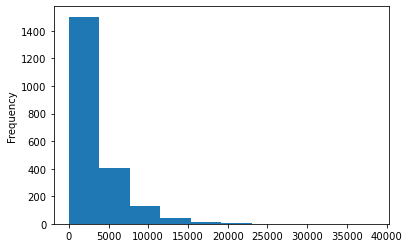

In [64]:
#Plot the distribution of total sales value purchased at the household level.
(transactions.groupby('household_key')['SALES_VALUE'].sum()).plot.hist();

In [65]:
#What were the top 10 households by quantity purchased?
(
    transactions
    .groupby('household_key')[['QUANTITY']].sum()
    .sort_values('QUANTITY', ascending=False)
    .head(10)
)

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [66]:
#What were the top 10 households by sales value?
(
    transactions
    .groupby('household_key')[['SALES_VALUE']].sum()
    .sort_values('SALES_VALUE', ascending=False)
    .head(10)
)

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


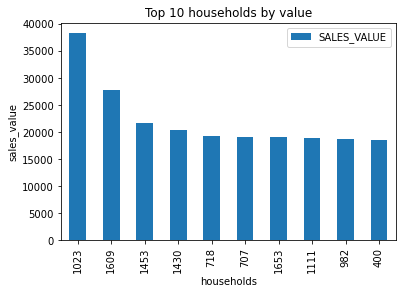

In [67]:
#Plot the total sales value for our top 10 households by value, ordered from highest to lowest.
(
    (transactions
     .groupby('household_key')[['SALES_VALUE']].sum()
     .sort_values('SALES_VALUE', ascending=False).head(10))
     .plot.bar(xlabel='households',
             ylabel='sales_value',
             title='Top 10 households by value')
);

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [97]:
#Which products had the most sales by sales_value?
(
    (transactions
     .groupby('PRODUCT_ID')[['SALES_VALUE']].sum()
     .sort_values('SALES_VALUE', ascending=False))
     .head(1)
)

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13


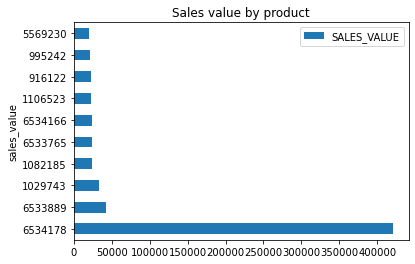

In [98]:
#Plot a horizontal bar chart.
(
    ((transactions
     .groupby('PRODUCT_ID')[['SALES_VALUE']].sum()
     .sort_values('SALES_VALUE', ascending=False))
     .head(10)).plot.barh(xlabel='sales_value',
                         ylabel='prodcut_id',
                          title='Sales value by product')
);

In [130]:
#Did the top 10 selling items have a higher than average discount rate?
((transactions.sort_values('SALES_VALUE', ascending=False).loc[:10, ['SALES_VALUE','final_discount']]).head(10))


,SALES_VALUE,final_discount
894515,840.00,0
1675379,631.80,0
542697,505.00,0
949846,499.99,0
453031,455.00,0
435973,430.00,0
2759,400.00,0
1124644,329.99,0
666851,324.75,0
1222429,299.99,0


In [131]:
#len(transactions.loc[transactions['final_discount']==1])

64095

In [132]:
#transactions[['SALES_VALUE']].max()

SALES_VALUE    840.0
dtype: float64

In [ ]:
Which products had the most sales by sales_value? Plot a horizontal bar chart.
Did the top 10 selling items have a higher than average discount rate?
What was the most common PRODUCT_ID among rows with the households in our top 10 households by sales value?
Look up the names of the top 10 products by sales in the products.csv dataset.
Look up the product name of the item that had the highest quantity sold in a single row.

In [133]:
#What was the most common PRODUCT_ID among rows with the households in our top 10 households by sales value?
(
    (transactions
     .groupby(['PRODUCT_ID','household_key'])[['SALES_VALUE']].sum()
     .sort_values('SALES_VALUE', ascending=False))
    .head(10)
)

SALES_VALUE
PRODUCT_ID household_key             
6533889    1023               9444.06
6534178    755                7649.09
           1430               4062.56
           1527               4005.96
           1762               3816.67
           1029               3468.20
           1314               3375.94
           13                 3205.09
           1778               3202.03
           982                3094.27

In [130]:
#Look up the names of the top 10 products by sales in the products.csv dataset.
products = pd.read_csv("product.csv")
products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [131]:
#Look up the names of the top 10 products by sales in the products.csv dataset.
#first we join the the two tables based on product ID 
#Then we group by product name and sales_value
merged=transactions.merge(products, 
                  how='left',
                  left_on='PRODUCT_ID',
                  right_on='PRODUCT_ID')
merged.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentaje_discount,final_discount,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000,0,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779,0,1075,GROCERY,National,CRACKERS/MISC BKD FD,SNACK CRACKERS,9.5 OZ
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000,0,3664,MEAT,National,BEEF,GRND/PATTY - ROUND,
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000,0,2209,MEAT-PCKGD,National,BREAKFAST SAUSAGE/SANDWICHES,LINKS - RAW,12OZ
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.316667,1,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ


In [135]:
(

merged
    .groupby(['COMMODITY_DESC','SUB_COMMODITY_DESC'])[['SALES_VALUE']].sum()
    .sort_values('SALES_VALUE', ascending=False) 
    .iloc[0:10]
)

,,SALES_VALUE
COMMODITY_DESC,SUB_COMMODITY_DESC,
COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,502179.15
SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,134148.76
FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,132465.42
BEERS/ALES,BEERALEMALT LIQUORS,124241.14
CIGARETTES,CIGARETTES,81044.60
BEEF,CHOICE BEEF,63245.07
CHEESE,SHREDDED CHEESE,55680.49
BEEF,PRIMAL,53411.14
BATH TISSUES,TOILET TISSUE,49963.35


In [128]:
#Look up the product name of the item that had the highest quantity sold in a single row.
#first we join the the two tables based on product ID 
#Then we group by product name and category and quantity
(
merged
    .groupby('SUB_COMMODITY_DESC')[['QUANTITY']].sum()
    .sort_values('QUANTITY', ascending=False)    
).head(1)

,QUANTITY
SUB_COMMODITY_DESC,
GASOLINE-REG UNLEADED,213943574
